# Practical Delivery 2: Learning Decision Models
#### *by Sindre Øyen*

---

---

# 1 Introduction

    This paper will present a comprehensive analysis of the Hepatitis C Virus (HCV) dataset from the University of California, Irvine (UCI) Machine Learning Repository [1]. The focus of the paper will be to apply and evaluate various decision modeling techniques - encompassing preprocessing, model construction, and model evaluation. The paper will explore multiple preprocessing strategies, including handling missing values and feature modification, to prepare the dataset for the use in different machine learning models. These models will range from instance-based learning and decision trees to ensemble learning with trees and neural networks. The evaluation of the models will be based on a balanced construction, performance metrics, and yield curves, offering insights into their applicability in healthcare data analysis.

*To initialize this study, the dataset itself can be loaded from the ICU database as such:*

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# Loading in the dataset
hcv_data = fetch_ucirepo(id=571) 
  
# Separating the features and target
X = hcv_data.data.features 
y = hcv_data.data.targets 
  
def printInfo():
    print(hcv_data.metadata)  
    print(hcv_data.variables)

---

# 2 Preprocessing of the Dataset

In this section, I will perform a reasoned construction of various versions of the dataset. These will be possible to differentiate in the later performed work with the data to evaluate performance on different versions.

In [2]:
X

,Age,Sex,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
0,32,m,38.5,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0,7.7
1,32,m,38.5,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5,18.0
2,32,m,46.9,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3,36.2
3,32,m,43.2,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7,30.6
4,32,m,39.2,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,110.3,50.0,5.57,6.30,55.7,650.9,68.5,5.9
611,64,f,24.0,102.8,44.4,20.0,1.54,3.02,63.0,35.9,71.3,2.9
612,64,f,29.0,87.3,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3.5
613,46,f,33.0,NaN,62.0,20.0,3.56,4.20,52.0,50.0,71.0,39.0


In [3]:
X.describe()

,Age,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
count,615.000000,614.000000,597.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,614.000000
mean,47.408130,41.620195,68.283920,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,28.450814
std,10.055105,5.780629,26.028315,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,25.469689
min,19.000000,14.900000,11.300000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.900000
25%,39.000000,38.800000,52.500000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,16.400000
50%,47.000000,41.950000,66.200000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,23.000000
75%,54.000000,45.200000,80.100000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,33.075000
max,77.000000,82.200000,416.600000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,325.300000


### 2.1 Analysis of the Dataset

This section aims to understand and elaborate further on the HCV dataset and the data in it. By understanding missing values, statistical parameters, the types of characteristics, as well as the classification values, efficient work with the dataset can be better planned. As illustrated at it's web page at the UC Irvine's Machine Learning Repository, the data in the dataset is in the following format [1]:

| Variable Name | Role     | Type       | Demographic | Description | Units | Missing Values |
|---------------|----------|------------|-------------|-------------|-------|----------------|
| ID            | ID       | Integer    |             |  Patient ID |       | no             |
| Age           | Feature  | Integer    | Age         |             | years | no             |
| Sex           | Feature  | Binary     | Sex         |             |       | no             |
| ALB           | Feature  | Continuous |             |             |       | yes            |
| ALP           | Feature  | Continuous |             |             |       | yes            |
| AST           | Feature  | Continuous |             |             |       | yes            |
| BIL           | Feature  | Continuous |             |             |       | no             |
| CHE           | Feature  | Continuous |             |             |       | no             |
| CHOL          | Feature  | Continuous |             |             |       | yes            |
| CREA          | Feature  | Continuous |             |             |       | no             |
| CGT           | Feature  | Continuous |             |             |       | no             |
| PROT          | Feature  | Continuous |             |             |       | yes            |
| Category      | Target   | Categorical|             | values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis' |       | no             |
| ALT           | Feature  | Continuous |             |             |       | no             |


A quick note to be taken: For the features here the values are mostly continuous, which is somewhat expected as these are measurements gathered from the patients. The ID is a unique integer value, whilst the age is also of course a numerical-discrete value in integer form. The sex of the patients is a binary value of either 'm' or 'f'.
This will all be further discussed later in section 2.

#### 2.1.1 Missing Values Study
As can be read in the table, the HCV dataset from UC Irvine's Machine Learning Repository contains several variables, some of which have missing values. This section focuses on analyzing these missing values to understand their impact on the dataset and how they should be handled for effective machine learning model development. The variables with missing values, as seen in the table, are: ALB, ALP, AST, CHOL, and PROT. These are all continuous features, indicating that they are likely to represent some quantitative measurements. 

Understanding the extent of which values are missing within certain variables is crucial. It is important to calculate the proportion of missing values for each variable. If a significant proportion of data is missing in a particular variable, it might impact the reliability of any analysis involving that particular variable. Let's dive deeper into the missing value analysis:

In [4]:
import numpy as np
import pandas as pd

In [5]:
# ALB, ALP, AST, CHOL, and PROT has missing values
# Lets find the percentage of missing values for each of these variables
def missing_percentage(df):
    '''
    This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage.

    Parameters
    ----------
    df : DataFrame
        The pandas object holding the data.

    Returns
    -------
    missing_values : Series
        Total missing values of each feature.
    '''
    # Get the count of non null values of each feature
    total = df.notnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    total_null = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = np.round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)[np.round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2) != 0]
    return pd.concat([total, total_null, percent], axis = 1, keys = ['No. values', 'No. null', '%'])

missing_percentage(X)

,No. values,No. null,%
ALB,614,1,0.16
PROT,614,1,0.16
ALT,614,1,0.16
CHOL,605,10,1.63
ALP,597,18,2.93


In the result table above, it is apparent that the degree of which the values are missing is varying. I would devise my strategy based on this information. I also note that in the source it appears that ALT and AST have been swapped, and that it is in fact ALT that has a missing value.

Since ALB, PROT, and ALT each have only one missing value, we can either fill in these gaps with an estimated value, known as imputation, or we can remove these data points altogether. The right choice depends on the overall pattern of the data – if the data tends to lean heavily one way or the other, known as skewness, it could affect our decision.

Let's take a closer look at the data to decide what to do next.

In [6]:
# Find the range of each variable that has missing values
def describe_missing_vals(vals = ['ALB', 'PROT', 'ALT', 'CHOL', 'ALP'], data = X):
    print(data[vals].describe())

describe_missing_vals()

              ALB        PROT         ALT        CHOL         ALP
count  614.000000  614.000000  614.000000  605.000000  597.000000
mean    41.620195   72.044137   28.450814    5.368099   68.283920
std      5.780629    5.402636   25.469689    1.132728   26.028315
min     14.900000   44.800000    0.900000    1.430000   11.300000
25%     38.800000   69.300000   16.400000    4.610000   52.500000
50%     41.950000   72.200000   23.000000    5.300000   66.200000
75%     45.200000   75.400000   33.075000    6.060000   80.100000
max     82.200000   90.000000  325.300000    9.670000  416.600000


Let's break down these numbers!

Albumin (ALB):
- 1 missing value.
- The mean and median are close, indicating a relatively symmetrical distribution.
- Imputation is likely a good strategy here. Given the low percentage of missing data, mean or median imputation could work without significantly affecting the distribution.


Protein (PROT):
- 1 missing value.
- Similar to ALB, the distribution seems symmetrical.
- Again, mean or median imputation would be suitable due to the low percentage of missing data.


Alanine Aminotransferase (ALT):
- 1 missing value.
- The standard deviation is quite large relative to the mean, indicating variability.
- Given the data variability and that we have only a single missing entry, it might be a good solution to eliminate the entry with the missing data.


Cholesterol (CHOL):
- 10 missing values.
- The mean and median are fairly close, but the standard deviation is relatively high - relative to the mean value. 
- Given the slightly higher percentage of missing data (1.63%), a simple imputation might still be reasonable. However, I will attempt to use a more sofisticated imputation for this value. 


Alkaline Phosphatase (ALP):
- 18 missing values.
- There's a significant difference between the mean and the median, indicating a skewed distribution.
- The percentage of missing data is higher (2.93%). For skewed distributions, median imputation, or a more complex imputation method like regression imputation, could be considered to avoid introducing bias.

In [7]:
# ALB and PROT
# Imputing the missing value for ALB and PROT
X['ALB'].fillna(X['ALB'].mean(), inplace = True)
X['PROT'].fillna(X['PROT'].mean(), inplace = True)

# ALT
# Eliminating the entry with missing value for ALT
# Get the index of the entry with missing value for ALT
__index = X[X['ALT'].isnull()].index
X.dropna(subset = ['ALT'], inplace = True)
y.drop(__index, inplace = True)

# Create different versions of the dataset with different imputers
from sklearn.impute import KNNImputer, SimpleImputer

# Imputing the missing values for CHOL and ALP using different imputers to create different versions of the dataset
imputer_knn = KNNImputer(n_neighbors = 8)
imputer_regression = SimpleImputer(strategy = 'mean')

def get_imputed_data(imputer, df):
    '''
    This function takes an imputer object and a DataFrame as input and returns a DataFrame with the missing values imputed.

    Parameters
    ----------
    imputer : Imputer
        An imputer object.
    df : DataFrame
        The pandas object holding the data.

    Returns
    -------
    df : DataFrame
        The pandas object holding the data with the missing values imputed.
    '''
    # Imputing CHOL and ALP
    df_copy = df.copy()
    df_copy[['CHOL', 'ALP']] = imputer.fit_transform(df_copy[['CHOL', 'ALP']])
    return df_copy

print("Original:")
describe_missing_vals(['CHOL', 'ALP'])

print("\n Imputed with Regression:")
describe_missing_vals(['CHOL', 'ALP'], get_imputed_data(imputer_regression, X))

print("\nImputed with KNN:")
describe_missing_vals(['CHOL', 'ALP'], get_imputed_data(imputer_knn, X))


/var/folders/yf/hqn1sx256k77y1jwx4l6gnf00000gn/T/ipykernel_83064/3057496718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ALB'].fillna(X['ALB'].mean(), inplace = True)
/var/folders/yf/hqn1sx256k77y1jwx4l6gnf00000gn/T/ipykernel_83064/3057496718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PROT'].fillna(X['PROT'].mean(), inplace = True)
/var/folders/yf/hqn1sx256k77y1jwx4l6gnf00000gn/T/ipykernel_83064/3057496718.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Original:
             CHOL         ALP
count  604.000000  596.000000
mean     5.367053   68.304027
std      1.133375   26.045538
min      1.430000   11.300000
25%      4.607500   52.500000
50%      5.300000   66.250000
75%      6.065000   80.125000
max      9.670000  416.600000

 Imputed with Regression:
             CHOL         ALP
count  614.000000  614.000000
mean     5.367053   68.304027
std      1.124092   25.660291
min      1.430000   11.300000
25%      4.620000   52.925000
50%      5.305000   66.700000
75%      6.057500   79.300000
max      9.670000  416.600000

Imputed with KNN:
             CHOL         ALP
count  614.000000  614.000000
mean     5.366708   68.242507
std      1.124769   25.682554
min      1.430000   11.300000
25%      4.620000   52.900000
50%      5.300000   66.300000
75%      6.060000   79.300000
max      9.670000  416.600000


With the data from after imputing, the data seem to have kept a distribution that is close to the original. I will keep these versions and utilize them for other purposes later on.

### 2.2 Feature Modification of the Dataset Versions

##### 2.2.1 Encoding

The dataset mostly consists of continuous variables, which simplifies the preprocessing as extensive encoding is not required. However, the 'Sex' feature is a categorical string, which may necessitate encoding for most machine learning models.

Some concerns thus comes to mind in terms of encoding:

- Label Encoding: Assigning a numerical value to each category of sex (for example, male as 0 and female as 1) is straightforward and computationally efficient. However, this method may suggest an ordinal relationship where none exists. This can in turn lead to a bias since there is no actual mathematical order or distance between the two categories.

- One-Hot Encoding: This approach creates binary columns for each category, avoiding the false numerical relation created by label encoding. While it does add more features to the model, the impact on performance should not be too drastical given the fact that the 'Sex' variable is binary (the ordinality will only increase by 1 point).

Considering the trade-offs, one-hot encoding seems the preferable choice. It prevents the model from misinterpreting the 'Sex' feature as ordinal and maintains the neutrality of the categories. The slight increase in dimensionality is a small price for the added clarity and should not significantly affect model performance.

The encoding process will utilize the ColumnTransformer from the sklearn library, as recommended by Sunny Srinidhi [2]:

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your dataframe is named 'df'

# Create the ColumnTransformer
transformer = ColumnTransformer(transformers=[('column_transformer', OneHotEncoder(), ['Sex'])], remainder='passthrough')

# Fit and transform the data
encoded_data = transformer.fit_transform(X)

# Get the column names for the one-hot encoded columns
encoded_feature_names = transformer.named_transformers_['column_transformer'].get_feature_names_out()

# Combine the new and original column names, excluding 'Sex' as it is now one-hot encoded
final_columns = list(encoded_feature_names) + list(X.drop('Sex', axis=1).columns)

# Convert the numpy array back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=final_columns)

# Convert the one-hot encoded columns to integers and the Age column to int
encoded_df[encoded_feature_names] = encoded_df[encoded_feature_names].astype(int)
encoded_df['Age'] = encoded_df['Age'].astype(int)

# Replace the original features with the encoded features
X = encoded_df

X 

,Sex_f,Sex_m,Age,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
0,0,1,32,38.5,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0,7.7
1,0,1,32,38.5,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5,18.0
2,0,1,32,46.9,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3,36.2
3,0,1,32,43.2,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7,30.6
4,0,1,32,39.2,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,62,32.0,416.6,110.3,50.0,5.57,6.30,55.7,650.9,68.5,5.9
610,1,0,64,24.0,102.8,44.4,20.0,1.54,3.02,63.0,35.9,71.3,2.9
611,1,0,64,29.0,87.3,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3.5
612,1,0,46,33.0,NaN,62.0,20.0,3.56,4.20,52.0,50.0,71.0,39.0


In [9]:
# We now have two versions of the dataset
# 1. The dataset with missing values imputed using KNN
# 2. The dataset with missing values imputed using regression
dataset_versions = [get_imputed_data(imputer_knn, X), get_imputed_data(imputer_regression, X)]

##### 2.2.2 Outlier Detection

Furthermore, outliers in the dataset should also be subject to investigation as they impose a potential misleading factor within the datasets. Given that this dataset intends to identify HCV or more severe liver disease in patients, concluding on whether outliers are misleading or indicative can be a little difficult - as it would require a more thorough understanding of the feature measurements and liver diseases in general. However, this section will focus on gaining an overview of the outliers in the dataset, as well as their respective properties.

In [10]:
from sklearn.ensemble import IsolationForest

# Create the isolation forest model
outlier_detector = IsolationForest(contamination=0.1, random_state=86)
outlier_detector.fit(dataset_versions[0])

# Predict the outliers
outlier_predictions = outlier_detector.predict(dataset_versions[0])
outlier_indices = np.where(outlier_predictions == -1)[0]

print("Number of entries within each target value:")
print(y.value_counts())
print("\n")
print("Number of outliers within each target value:")
print(y.iloc[outlier_indices].value_counts())


Number of entries within each target value:
Category              
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                23
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


Number of outliers within each target value:
Category              
3=Cirrhosis               29
0=Blood Donor             13
0s=suspect Blood Donor     7
2=Fibrosis                 7
1=Hepatitis                6
Name: count, dtype: int64


The analysis shows that outliers are found in all categories, with the highest number found in the 'Cirrhosis' category. This could suggest that patients with advanced liver disease have more variable or extreme test results, which is realistic given the seriousness and complexity of the condition. The presence of outliers in disease categories ('Hepatitis', 'Fibrosis', and 'Cirrhosis') may indicate patients with various stages of the disease. These outliers might represent critical cases for further clinical investigation.

Interestingly, outliers are also found in the 'Blood Donor' category. This could point to potential data entry errors, misclassifications, or rare health conditions unrelated to HCV. In a real situation, these cases should probably be further investigated by professionals within the field, as they are more educated to conclude whether these are caused by data entry errors or a more severe issue. I will perform *sample elimination* with regard to these instances as they only make up 2,4% of the blood donor data samples - and there is in fact a risk that these are just data errors.

In [11]:
# Remove the outliers of class 0=Blood Donor
# Must filter out the indices of the outliers of class "0=Blood Donor"
outlier_indices_blood = np.intersect1d(outlier_indices, np.where(y == "0=Blood Donor")[0])

print("Number of outliers within each target value that will be removed (should only say blood donor): \n")
print(y.iloc[outlier_indices_blood].value_counts())

# Remove the outliers of class 0=Blood Donor
dataset_versions[0].drop(outlier_indices_blood, inplace=True)
dataset_versions[1].drop(outlier_indices_blood, inplace=True)
y.drop(outlier_indices_blood, inplace=True)

Number of outliers within each target value that will be removed (should only say blood donor): 

Category     
0=Blood Donor    13
Name: count, dtype: int64


/var/folders/yf/hqn1sx256k77y1jwx4l6gnf00000gn/T/ipykernel_83064/3736934317.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop(outlier_indices_blood, inplace=True)


##### 2.2.3 Discretization

To further build on this preprocessing analysis, this section will seek to understand for which, if any, features discretization is of relevance. At this point the dataset can be described as such:

In [12]:
dataset_versions[0].describe() # Only displaying the first version of the dataset for brevity

,Sex_f,Sex_m,Age,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.00000
mean,0.382696,0.617304,47.164725,41.747954,67.863227,34.783195,11.433777,8.191082,5.364590,81.476040,39.273378,72.195415,28.43827
std,0.486450,0.486450,9.893154,5.653116,25.567613,33.371167,19.785643,2.176393,1.093764,50.215174,54.540973,5.209096,25.65412
min,0.000000,0.000000,19.000000,14.900000,11.300000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.90000
25%,0.000000,0.000000,39.000000,39.000000,52.900000,21.600000,5.300000,6.950000,4.620000,68.000000,15.700000,69.500000,16.30000
50%,0.000000,1.000000,47.000000,42.000000,66.000000,25.800000,7.300000,8.270000,5.300000,77.000000,23.300000,72.200000,22.90000
75%,1.000000,1.000000,54.000000,45.300000,79.000000,32.800000,11.300000,9.570000,6.060000,88.000000,39.500000,75.400000,33.10000
max,1.000000,1.000000,77.000000,82.200000,416.600000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,325.30000


Basing purely on the description of the data - ALP, AST, BIL, CHE, CREA, CGT, and ALT are potential candidates for discretization due to their skewed distributions and the presence of outliers. Discretization of these variables might enhance the model's ability to identify patterns and robustness. Thus, I want to create two new versions for each of the previous versions -> discretized and non-discretized.

In [13]:
# Discretizing ALP, AST, BIL, CHE, CREA, CGT, and ALT

from sklearn.preprocessing import KBinsDiscretizer

def discretize(df, cols, n_bins=5, strategy='uniform'):
    '''
    This function takes a DataFrame, a list of column names, the number of bins, and the strategy as input and returns a DataFrame with the specified columns discretized.

    Parameters
    ----------
    df : DataFrame
        The pandas object holding the data.
    cols : list
        A list of column names.
    n_bins : int
        The number of bins to discretize the data into.
    strategy : str
        The strategy to use to create the bins.

    Returns
    -------
    df : DataFrame
        The pandas object holding the data with the specified columns discretized.
    '''
    # Create the discretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)

    # Fit and transform the data
    df_copy = df.copy()
    df_copy[cols] = discretizer.fit_transform(df[cols])

    return df

# Discretize the specified columns
dataset_versions = [dataset_versions[0], discretize(dataset_versions[0], ['ALP', 'AST', 'BIL', 'CHE', 'CREA', 'CGT', 'ALT']), 
                    dataset_versions[1], discretize(dataset_versions[1], ['ALP', 'AST', 'BIL', 'CHE', 'CREA', 'CGT', 'ALT'])]


/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


##### 2.2.4 Standardization

We can also create more versions of the dataset with standardization:

In [14]:
# We will work further on these to create different versions of the dataset
from sklearn.preprocessing import StandardScaler, RobustScaler

# Create different versions of the dataset with different scalers
# Here I am using StandardScaler and RobustScaler because RobustScaler is more robust to outliers
# and StandardScaler is more sensitive to outliers. This will help us study the effect of outliers on the dataset.
scalers = [StandardScaler(), RobustScaler()]

def get_scaled_data(scaler, df):
    '''
    This function takes a scaler object and a DataFrame as input and returns a DataFrame with the features scaled.

    Parameters
    ----------
    scaler : Scaler
        A scaler object.
    df : DataFrame
        The pandas object holding the data.

    Returns
    -------
    df : DataFrame
        The pandas object holding the data with the features scaled.
    '''
    # Scaling the features except the one-hot encoded features
    df_copy = df.copy()
    df_copy[df.drop(encoded_feature_names, axis=1).columns] = scaler.fit_transform(df.drop(encoded_feature_names, axis=1))
    return df_copy

# Create different versions of the dataset with different scalers
dataset_versions_scaled = [get_scaled_data(scaler, df) for df in dataset_versions for scaler in scalers]

# Print the differences between the original dataset and the different versions of the dataset
def __print_scaled_versions():
    for i in range(0, len(dataset_versions_scaled)):
        print("#"*20, "\nDataset version", i+1, ":\n")
        print(dataset_versions_scaled[i].describe(), "\n")

# Uncomment if you want to study the differences between the datasets
#__print_scaled_versions() # Commented out for brevity

With our now *8 versions* of the dataset, we can move on to work further with the different datasets.

These are the different datasets:
1. The dataset with missing values imputed using `KNN` and scaled using `StandardScaler`

2. The dataset with missing values imputed using `KNN` and scaled using `RobustScaler`

3. `[#Discretized]` The dataset with missing values imputed using `KNN` and scaled using `StandardScaler`

4. `[#Discretized]` The dataset with missing values imputed using `KNN` and scaled using `RobustScaler`

5. The dataset with missing values imputed using `regression` and scaled using `StandardScaler`

6. The dataset with missing values imputed using `regression` and scaled using `RobustScaler`

7. `[#Discretized]` The dataset with missing values imputed using `regression` and scaled using `StandardScaler`

8. `[#Discretized]` The dataset with missing values imputed using `regression` and scaled using `RobustScaler`

These can now be accessed using `dataset_versions_scaled[i-1]`

### 2.3 Feature Count Reduction of the Dataset Versions 

##### 2.3.1 Principal Component Analysis

In order to reduce the feature count and include the most relevant features, I am going to analyse the dataset by using PCA (principal component analysis). This analysis looks at the variance within the different entries for the different features and gives an indication of which features are of the greatest relevance.

In [15]:
# Let's perform a principal component analysis on the dataset
from sklearn.decomposition import PCA
dataset_versions_scaled[0].describe()

,Sex_f,Sex_m,Age,ALB,ALP,AST,BIL,CHE,CHOL,CREA,CGT,PROT,ALT
count,601.000000,601.000000,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02,6.010000e+02
mean,0.382696,0.617304,-1.773401e-16,-7.093605e-17,1.004927e-16,1.300494e-16,3.546802e-17,-2.364535e-16,-8.867006e-17,8.275872e-17,3.546802e-17,1.129065e-15,9.458140e-17
std,0.486450,0.486450,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00,1.000833e+00
min,0.000000,0.000000,-2.849262e+00,-4.753187e+00,-2.214143e+00,-7.252770e-01,-5.378968e-01,-3.113739e+00,-3.600289e+00,-1.464443e+00,-6.380954e-01,-5.263530e+00,-1.074338e+00
25%,0.000000,0.000000,-8.259779e-01,-4.865003e-01,-5.857290e-01,-3.953765e-01,-3.102697e-01,-5.707219e-01,-6.813263e-01,-2.685894e-01,-4.325741e-01,-5.178748e-01,-4.735450e-01
50%,0.000000,1.000000,-1.666432e-02,4.462251e-02,-7.293521e-02,-2.694145e-01,-2.091021e-01,3.629133e-02,-5.910224e-02,-8.921145e-02,-2.931133e-01,8.810132e-04,-2.160621e-01
75%,1.000000,1.000000,6.914851e-01,6.288576e-01,4.359441e-01,-5.947789e-02,-6.766951e-03,6.341073e-01,6.363246e-01,1.300283e-01,4.158545e-03,6.157027e-01,1.818661e-01
max,1.000000,1.000000,3.018262e+00,7.161668e+00,1.365115e+01,8.673887e+00,1.226992e+01,3.779539e+00,3.939602e+00,1.988353e+01,1.122342e+01,3.420827e+00,1.158134e+01


Below I have typed out a method for performing a principal component analysis and transforming the existing datasets into further versions.

In [16]:

def pca_transform(df):
    '''
    This function takes a DataFrame as input and returns a DataFrame with the features transformed using PCA.

    Parameters
    ----------
    df : DataFrame
        The pandas object holding the data.

    Returns
    -------
    df : DataFrame
        The pandas object holding the data with the features transformed using PCA.
    '''
    # Create the PCA object
    pca = PCA(svd_solver='randomized', random_state=86, n_oversamples=10) # n_oversamples is set to 10 to avoid the warning, 10 is the default value

    # Fit and transform the data
    df_copy = df.copy()
    df_copy[df.drop(encoded_feature_names, axis=1).columns] = pca.fit_transform(df.drop(encoded_feature_names, axis=1))
    # Removing the features with low variance
    df_copy = df_copy.iloc[:, :pca.n_components_]

    # Print the features that were dropped
    print("Dropped features", ', '.join(df.columns[pca.n_components_:]), "due to low variance.")

    return df_copy

dataset_versions_scaled_pca = [pca_transform(df) for df in dataset_versions_scaled]

Dropped features PROT, ALT due to low variance.
Dropped features PROT, ALT due to low variance.
Dropped features PROT, ALT due to low variance.
Dropped features PROT, ALT due to low variance.
Dropped features PROT, ALT due to low variance.
Dropped features PROT, ALT due to low variance.
Dropped features PROT, ALT due to low variance.
Dropped features PROT, ALT due to low variance.


The PCA analysis resulted in 8 new versions of the dataset, where each of them have removed the PROT and the ALT feature due to their low variances.

### 2.4 Example Set Modification of the Dataset Versions

With regard to altering the sample-set of the different dataset versions, some approaches make themselves relevant. Firstly, in an earlier section we performed an outlier analysis and a small sample reduction. Secondly, over-sampling and under-sampling of the dataset should also be considered, which this section focuses on facilitating:

In [17]:
y.value_counts()

Category              
0=Blood Donor             520
3=Cirrhosis                30
1=Hepatitis                23
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

There is a notable imbalance between the majority class (blood donor) and the minority classes here. This is definitely common for a dataset within the medical field, but it is also important to remember that the goal here is to understand as much as possible about the minority classes. So, what is the best approach to mitigate this imbalance? Well, it depends. Given that this is medical data, it is important to always keep in mind that the cost of a false negative is of course much higher than the cost of a false positive. Thus, we want to understand as much as possible with regard to the minority classes. 

I introduce these methods to facilitate over- and under-sampling of the datasets. These will both be optional parameters when using the dataset later on in the task, because even though they both introduce their own advantages they also have their downsides. While over-sampling can facilitate better opportunities for the models to catch on to patterns in the dataset, it also introduces the risk of over-fitting. Simultaneously, under-fitting may result in loss of important data as this is a medical dataset. 

However, as a proof of concept the methods are defined and available under to be tested by the implemented models.

In [18]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

def over_sample(df: pd.DataFrame, targets: pd.DataFrame = y.copy(), strat: int = 0):
    '''
    This function takes a DataFrame as input and returns a DataFrame with the features over-sampled.

    Parameters
    ----------
    df : DataFrame
        The pandas object holding the data.
    strat : str
        The strategy to use for over-sampling. Can be 0 = SMOTE or 1 = RandomOverSampler or 2 = ADASYN.

    Returns
    -------
    df : DataFrame
        The pandas object holding the data with the features over-sampled.
    '''
    # Create the over-sampler
    if strat != 0 and strat != 1 and strat != 2: raise ValueError("Invalid strategy. Must be 0 = SMOTE or 1 = RandomOverSampler or 2 = ADASYN.")
    over_sampler = SMOTE(random_state=86) if strat == 0 else (RandomOverSampler(random_state=86) if strat == 1 else ADASYN(random_state=86))
    return over_sampler.fit_resample(df, targets)

from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

def under_sample(df: pd.DataFrame, targets: pd.DataFrame = y.copy(), strat: int = 0):
    '''
    This function takes a DataFrame as input and returns a DataFrame with the features under-sampled.

    Parameters
    ----------
    df : DataFrame
        The pandas object holding the data.
    strat : str
        The strategy to use for under-sampling. Can be 0 = RandomUnderSampler or 1 = NearMiss or 2 = TomekLinks.

    Returns
    -------
    df : DataFrame
        The pandas object holding the data with the features under-sampled.
    '''
    # Create the under-sampler
    if strat != 0 and strat != 1 and strat != 2: raise ValueError("Invalid strategy. Must be 0 = RandomUnderSampler or 1 = NearMiss or 2 = TomekLinks.")
    under_sampler = RandomUnderSampler(random_state=86) if strat == 0 else (NearMiss(version=1, n_neighbors=3) if strat == 1 else TomekLinks())
    return under_sampler.fit_resample(df, targets)

---

# 3 Construction of Decision Models

### 3.1 Setup

##### 3.1.1 Access to Data Versions

*Creating a common access point for the different dataset versions. This method `data()` now allows for the creation of many different versions of the dataset with different preprocessing settings.*

In [19]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

def data(version=0, pca=False, resample_strat=-1, binary=False):
    '''
    This function takes a version number and a boolean as input and returns the training and testing sets.

    Parameters
    ----------
    version : int
        The version of the dataset to use.
        Default value is 0.
        
        These are the different versions:
            0 = The dataset with missing values imputed using `KNN` and scaled using `StandardScaler`

            1 = The dataset with missing values imputed using `KNN` and scaled using `RobustScaler`

            2 = `[#Discretized]` The dataset with missing values imputed using `KNN` and scaled using `StandardScaler`

            3 = `[#Discretized]` The dataset with missing values imputed using `KNN` and scaled using `RobustScaler`

            4 = The dataset with missing values imputed using `regression` and scaled using `StandardScaler`

            5 = The dataset with missing values imputed using `regression` and scaled using `RobustScaler`

            6 = `[#Discretized]` The dataset with missing values imputed using `regression` and scaled using `StandardScaler`

            7 = `[#Discretized]` The dataset with missing values imputed using `regression` and scaled using `RobustScaler`
                
    pca : bool
        Whether to use the PCA transformed dataset or not.
        Default value is False.
    
    resample_strat : int
        The strategy to use for resampling the data.
        Default value is -1.

        These are the different strategies:
            0 = SMOTE (over-sampling),
            1 = RandomOverSampler (over-sampling),
            2 = ADASYN (over-sampling)

            3 = RandomUnderSampler (under-sampling),
            4 = NearMiss (under-sampling),
            5 = TomekLinks (under-sampling)

    binary : bool
        Whether to convert the targets to binary or not.

    Returns
    -------
    X_train : DataFrame
        The pandas object holding the training data.
    X_test : DataFrame
        The pandas object holding the testing data.
    y_train : Series
        The pandas object holding the training targets.
    y_test : Series
        The pandas object holding the testing targets.
    '''

    if version < 0 or version > 7:
        raise ValueError("Version must be between 0 and 7.")
    # Get the dataset version
    df = dataset_versions_scaled_pca[version] if pca else dataset_versions_scaled[version]
    __y = y.copy()

    # Convert the Blood Donor class to 0 and the everything else to 1
    if binary: __y = np.where(__y.to_numpy() == "0=Blood Donor", 0, 1)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df, __y, test_size=0.30, random_state=86, stratify=__y)

    # Over-sample the training data
    if resample_strat == 0 or resample_strat == 1 or resample_strat == 2:
        X_train, y_train = over_sample(X_train, y_train, resample_strat)
    elif resample_strat == 3 or resample_strat == 4 or resample_strat == 5:
        X_train, y_train = under_sample(X_train, y_train, resample_strat-3)

    return X_train, X_test, y_train, y_test

##### 3.1.2 Evaluation Method

*Here I am creating a method that will display detailed data that will be useful for evaluation of the different models. This method creates a useful and common interface for comparison with regard to the same measurements. I am focusing on the classification report, the confusion matrix, as well as important yield curves such as PR- and ROC curves.*

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

def __bold(string): return "\033[1m" + string + "\033[0m"

def evaluate(model, X_test, y_test):
    '''
    This function takes a model, the testing data, and the testing targets as input and prints a detailed evaluation of the model.

    Parameters
    ----------
    model : Model
        The model to evaluate.
    X_test : DataFrame
        The pandas object holding the testing data.
    y_test : Series
        The pandas object holding the testing targets.

    Returns
    -------
    None
    '''
    # Predict the targets
    y_pred = model.predict(X_test)

    # Print the accuracy, precision, recall, and F1 score
    print("", __bold("#"*20), "\n" + __bold(" Model Evaluation:") + "\n", __bold("#"*20), "\n")

    print(__bold("(1) Performance Evaluation:"))
    # Plot the classification report in a nice table
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Configure the matrix plot
    plt.figure(figsize=(4, 7))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion matrix")
    if len(np.unique(y_pred)) != 2: 
        plt.xticks(np.arange(0, 5), ['0=Blood Donor', '0s=Suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'], rotation=45)
        plt.yticks(np.arange(0, 5), ['0=Blood Donor', '0s=Suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'])
    else:
        plt.xticks(np.arange(0, 2), ['Healthy', 'Liver disease'])
        plt.yticks(np.arange(0, 2), ['Healthy', 'Liver disease'])
    # Add the numbers to the plot
    for i in range(0, cm.shape[0]):
        for j in range(0, cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max()/2 else ("gray" if cm[i, j] == 0 else "black"))
    plt.show()

    if len(np.unique(y_pred)) != 2: return
    print(__bold("(2) Yield Curves:"))
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(precision, recall)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("Precision-Recall Curve")

    plt.text(0.5, 0.5, "AUC = " + str(np.round(np.trapz(recall, precision), 2)))
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # Area under the curve
    plt.title("ROC Curve")

    plt.text(0.5, 0.5, "AUC = " + str(np.round(np.trapz(tpr, fpr), 2)))
    plt.show()
    

### 3.2 Instance Based Learning

##### 3.2.1 K-Nearest Neighbors
*Performing Cross Validation grid search for hyperparameter adjustments*

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
metrics = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan", "nan_euclidean", "minkowski"]

# Scoring: 
# 'precision_samples', 'neg_brier_score', 'matthews_corrcoef', 'roc_auc', 'f1_micro', 'recall_micro', 'r2', 
# 'jaccard_weighted', 'roc_auc_ovr_weighted', 'fowlkes_mallows_score', 'neg_mean_poisson_deviance', 'precision', 
# 'f1_samples', 'precision_micro', 'recall_macro', 'homogeneity_score', 'neg_mean_absolute_percentage_error', 
# 'roc_auc_ovo', 'f1', 'recall_weighted', 'jaccard', 'accuracy', 'neg_mean_squared_log_error', 'jaccard_samples', 
# 'adjusted_mutual_info_score', 'positive_likelihood_ratio', 'roc_auc_ovr', 'jaccard_macro', 'neg_mean_gamma_deviance', 
# 'roc_auc_ovo_weighted', 'neg_mean_squared_error', 'normalized_mutual_info_score', 'explained_variance', 'f1_macro', 
# 'recall_samples', 'mutual_info_score', 'precision_weighted', 'rand_score', 'precision_macro', 'neg_log_loss', 'max_error', 
# 'balanced_accuracy', 'neg_mean_absolute_error', 'average_precision', 'adjusted_rand_score', 'recall', 'v_measure_score', 
# 'neg_median_absolute_error', 'top_k_accuracy', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 
# 'completeness_score', 'jaccard_micro', 'f1_weighted']

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Best parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.95      0.99      0.97       157
0s=suspect Blood Donor       1.00      0.50      0.67         2
           1=Hepatitis       0.50      0.43      0.46         7
            2=Fibrosis       0.33      0.17      0.22         6
           3=Cirrhosis       0.71      0.56      0.63         9

              accuracy                           0.91       181
             macro avg       0.70      0.53      0.59       181
          weighted avg       0.90      0.91      0.90       181



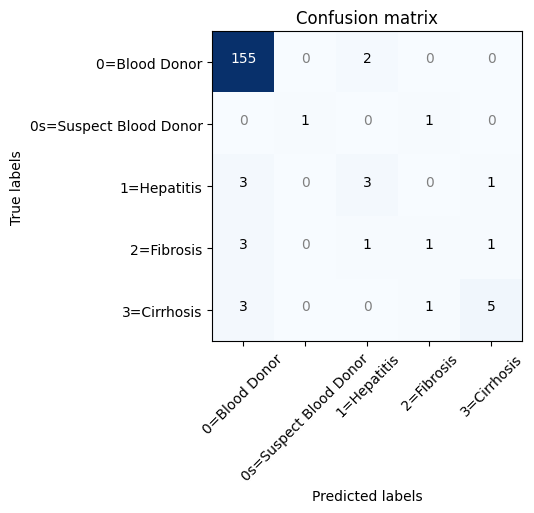

In [23]:
# Instance based learning
from sklearn.neighbors import KNeighborsClassifier

# Data
__binary = False
instance_based_data = data(version=2, pca=True, resample_strat=1, binary=__binary)

# Init the model
knn = KNeighborsClassifier()

# Create the grid search
param_grid = {'n_neighbors': [2, 3, 4, 6], 'weights': ['uniform', 'distance'], 'metric': metrics}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc_ovr', verbose=1, n_jobs=-1)

grid_search.fit(instance_based_data[0], instance_based_data[2].ravel() if __binary else instance_based_data[2].values.ravel())
print("Best parameters:", grid_search.best_params_)

evaluate(grid_search.best_estimator_, instance_based_data[1], instance_based_data[3])

##### 3.2.2 One-vs-Rest Classifier

 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.99      0.93      0.96       157
0s=suspect Blood Donor       0.25      0.50      0.33         2
           1=Hepatitis       0.29      0.57      0.38         7
            2=Fibrosis       0.50      0.33      0.40         6
           3=Cirrhosis       0.55      0.67      0.60         9

              accuracy                           0.88       181
             macro avg       0.51      0.60      0.53       181
          weighted avg       0.91      0.88      0.89       181



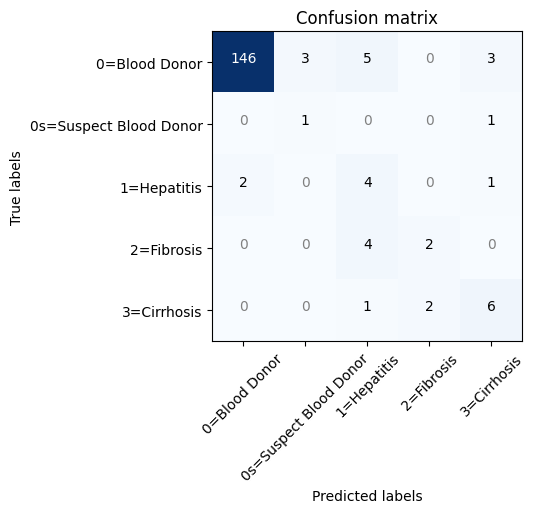

In [24]:
# Perform a OvR classification
from sklearn.multiclass import OneVsRestClassifier

# Data
ovr_data = data(version=2, pca=True, resample_strat=1, binary=False)

# Init the model
knn = KNeighborsClassifier(metric='cosine')

# Create the OvR classifier
ovr = OneVsRestClassifier(knn, n_jobs=-1)

# Fit the model
ovr.fit(ovr_data[0], ovr_data[2].values.ravel())

# Evaluate the model
evaluate(ovr, ovr_data[1], ovr_data[3])

### 3.3 Decision Trees

In [25]:
from sklearn.tree import export_graphviz

# Method borrowed from the course material.
# Found in the Jupyter Notebook "Árboles de decisión.ipynb".
def show_tree(tree_clf,features):
    print("-"*20, "\nDecision Tree\n", "-"*20)
    export_graphviz(
        tree_clf,
        out_file="tree_clf.dot",
        feature_names=features,
        rounded=True,
        filled=True)
    !dot -Tpng tree_clf.dot -o tree_clf.png
    plt.clf()
    dpi = 130
    image = plt.imread("tree_clf.png")
    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(image)
    plt.show()

##### 3.3.1 Model Construction

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 3} 

-------------------- 
Decision Tree
 --------------------


<Figure size 640x480 with 0 Axes>

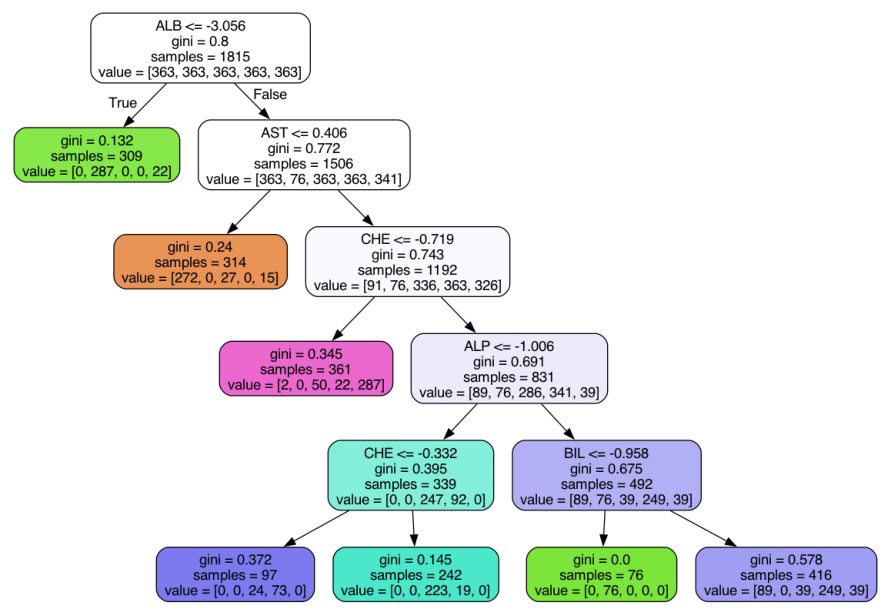

 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.99      0.82      0.90       157
0s=suspect Blood Donor       1.00      0.50      0.67         2
           1=Hepatitis       0.50      0.29      0.36         7
            2=Fibrosis       0.11      0.67      0.20         6
           3=Cirrhosis       0.73      0.89      0.80         9

              accuracy                           0.80       181
             macro avg       0.67      0.63      0.58       181
          weighted avg       0.93      0.80      0.85       181



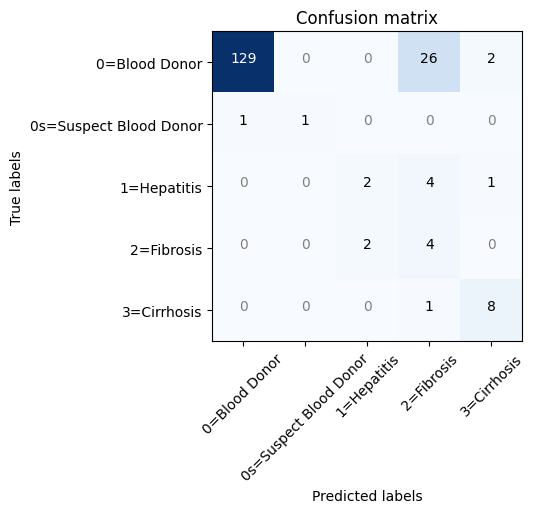

In [26]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

# Data
__binary = False
decision_tree_data = data(version=7, pca=False, resample_strat=1, binary=__binary)

# Init the model
decision_tree = DecisionTreeClassifier(random_state=86)

# A-priori pruning
param_grid = {'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10], 'max_leaf_nodes': [3, 4, 5, 6, 7]}
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='recall_macro', verbose=1, n_jobs=-1)

grid_search.fit(decision_tree_data[0], decision_tree_data[2].ravel() if __binary else decision_tree_data[2].values.ravel())
print("Best parameters:", grid_search.best_params_, "\n")

show_tree(grid_search.best_estimator_, decision_tree_data[0].columns)
evaluate(grid_search.best_estimator_, decision_tree_data[1], decision_tree_data[3])

This tree is performing quite well. The negative aspects is that it  gives out quite a lot (28) of false-positives. However, it does not for any of Hepatitis, Fibrosis, and Cirrhosis predict a false-negative, which would be the scariest. 

Note that this tree has a lot of nodes and a quite large depth. To some extent mitigate the risk of overfitting I want to further prune this tree with post-pruning.

##### 3.3.2 Post Pruning

Left children:
 [ 1 -1  3 -1  5 -1  7 11  9 -1 -1 -1 -1]
Right children:
 [ 2 -1  4 -1  6 -1  8 12 10 -1 -1 -1 -1]
Feature:
 [ 3 -2  5 -2  7 -2  4  7  6 -2 -2 -2 -2]
Threshold:
 [-3.05555558 -2.          0.40625    -2.         -0.71946564 -2.
 -1.00574714 -0.33206107 -0.95833334 -2.         -2.         -2.
 -2.        ]
-------------------- 
Decision Tree
 --------------------


<Figure size 640x480 with 0 Axes>

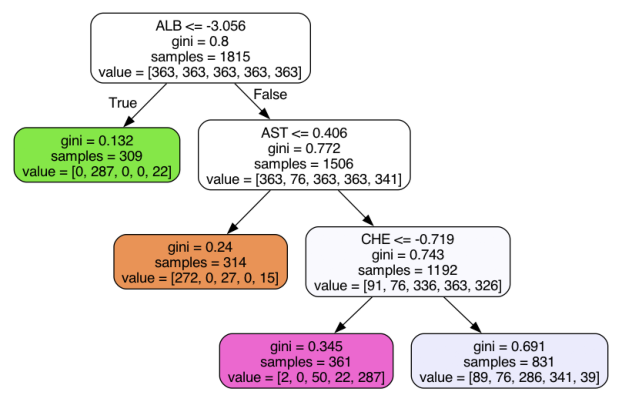

 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.99      0.82      0.90       157
0s=suspect Blood Donor       1.00      0.50      0.67         2
           1=Hepatitis       0.00      0.00      0.00         7
            2=Fibrosis       0.15      1.00      0.27         6
           3=Cirrhosis       0.73      0.89      0.80         9

              accuracy                           0.80       181
             macro avg       0.57      0.64      0.53       181
          weighted avg       0.91      0.80      0.84       181



/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and

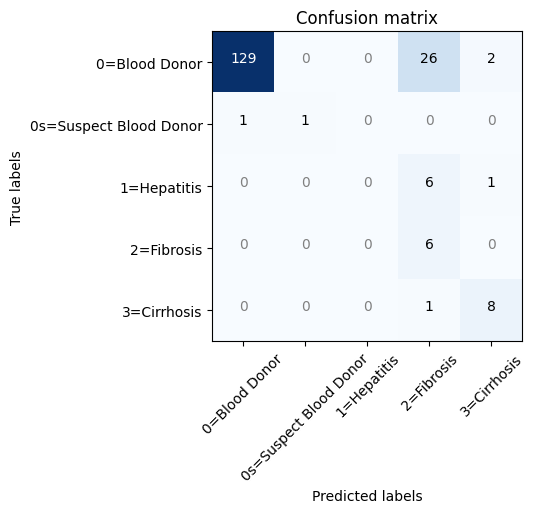

In [27]:
from copy import deepcopy

# Creating a copy of the tree
tree_copy = deepcopy(grid_search.best_estimator_)

# This tree has these properties
print("Left children:\n", tree_copy.tree_.children_left)
print("Right children:\n", tree_copy.tree_.children_right)
print("Feature:\n", tree_copy.tree_.feature)
print("Threshold:\n", tree_copy.tree_.threshold)

# Prune the tree
# Left children indices to prune
left_prune = [6]
tree_copy.tree_.children_left[left_prune] = -1
tree_copy.tree_.children_right[6] = -1

# Show the pruned tree
show_tree(tree_copy, decision_tree_data[1].columns)
evaluate(tree_copy, decision_tree_data[1], decision_tree_data[3])

The pruned down tree is less prone to overfitting, but has introduced some new concerns. While the false-positives are still prevalent to the same extent, the accuracy for the distinction between Hepatitis and Fibrosis has decremented significantly. But again, for the purposes of this training the main focus is to avoid false-negatives and with regards to this, it does a rather pleasant job. 

### 3.4 Ensemble Learning with Trees

*Random Forest*

Fitting 5 folds for each of 75 candidates, totalling 375 fits


Best parameters: {'max_depth': 4, 'max_leaf_nodes': 7, 'n_estimators': 300}
 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.96      0.98       157
0s=suspect Blood Donor       1.00      0.50      0.67         2
           1=Hepatitis       0.50      0.43      0.46         7
            2=Fibrosis       0.17      0.33      0.22         6
           3=Cirrhosis       0.73      0.89      0.80         9

              accuracy                           0.91       181
             macro avg       0.68      0.62      0.63       181
          weighted avg       0.94      0.91      0.92       181



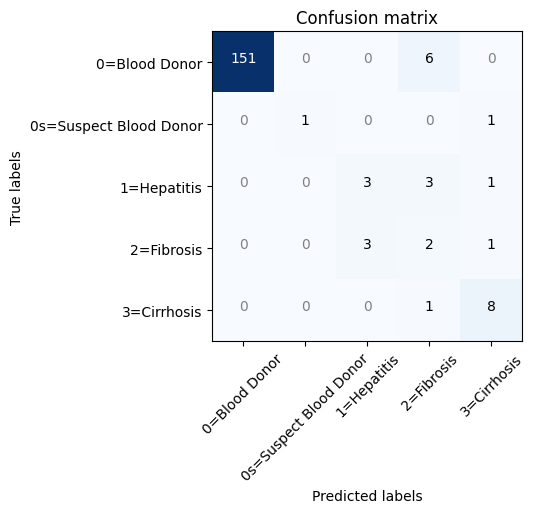

In [28]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# Data
__binary = False
random_forest_data = data(version=3, pca=False, resample_strat=1, binary=__binary)

# Init the model
random_forest = RandomForestClassifier(random_state=86)

# Hyper-parameter tuning
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [2, 3, 4, 5, 6], 'max_leaf_nodes': [3, 4, 5, 6, 7]}
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='recall_macro', verbose=1, n_jobs=-1)

grid_search.fit(random_forest_data[0], random_forest_data[2].ravel() if __binary else random_forest_data[2].values.ravel())
print("Best parameters:", grid_search.best_params_)
evaluate(grid_search.best_estimator_, random_forest_data[1], random_forest_data[3])

*Gradient Boosting*

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 3, 'max_leaf_nodes': 4, 'n_estimators': 200}
 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.98      0.99      0.98       157
0s=suspect Blood Donor       1.00      1.00      1.00         2
           1=Hepatitis       0.67      0.57      0.62         7
            2=Fibrosis       0.43      0.50      0.46         6
           3=Cirrhosis       0.88      0.78      0.82         9

              accuracy                           0.94       181
             macro avg       0.79      0.77      0.78       181
          weighted avg       0.95      0.94      0.94       181



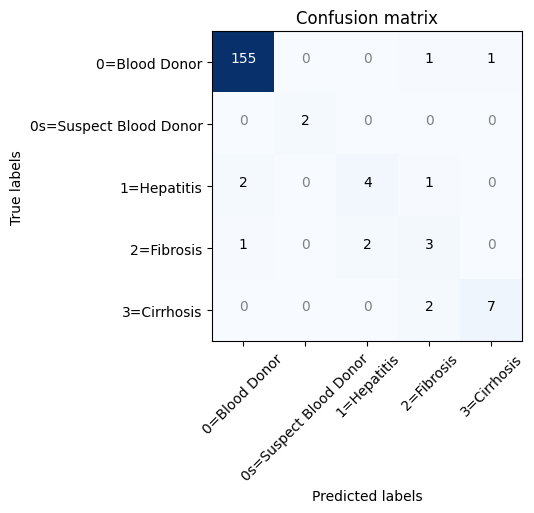

In [29]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# Data
__binary = False
gradient_boosting_data = data(version=3, pca=True, resample_strat=1, binary=__binary)

# Init the model
gradient_boosting = GradientBoostingClassifier(random_state=86)

# Hyper-parameter tuning
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'max_leaf_nodes': [4, 5, 6]}
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='roc_auc_ovo', verbose=1, n_jobs=-1)

grid_search.fit(gradient_boosting_data[0], gradient_boosting_data[2].ravel() if __binary else gradient_boosting_data[2].values.ravel())
print("Best parameters:", grid_search.best_params_)
evaluate(grid_search.best_estimator_, gradient_boosting_data[1], gradient_boosting_data[3])

### 3.5 Linear Models

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best parameters: {'C': 100, 'kernel': 'rbf'}
 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.98      0.99      0.99       157
0s=suspect Blood Donor       0.50      0.50      0.50         2
           1=Hepatitis       0.43      0.43      0.43         7
            2=Fibrosis       0.40      0.33      0.36         6
           3=Cirrhosis       0.75      0.67      0.71         9

              accuracy                           0.93       181
             macro avg       0.61      0.58      0.60       181
          weighted avg       0.92      0.93      0.93       181



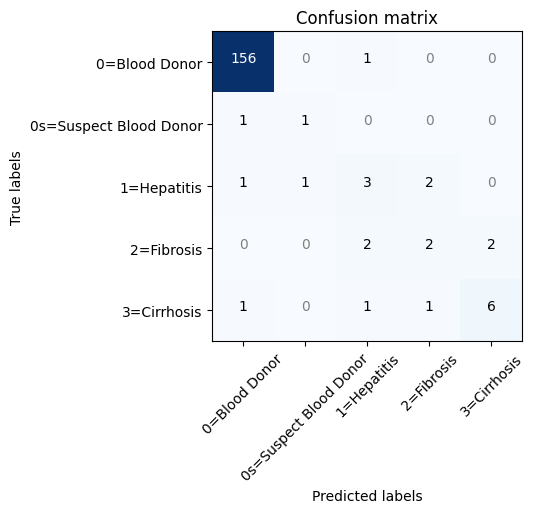

In [30]:
# Support vector machine
from sklearn.svm import SVC

# Data
__binary = False
svm_data = data(version=3, pca=False, resample_strat=1, binary=__binary)

# Init the model
svm = SVC(random_state=86)

# Hyper-parameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='recall_macro', verbose=1, n_jobs=-1)

grid_search.fit(svm_data[0], svm_data[2].ravel() if __binary else svm_data[2].values.ravel())
print("Best parameters:", grid_search.best_params_)
evaluate(grid_search.best_estimator_, svm_data[1], svm_data[3])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.99      0.90      0.94       157
0s=suspect Blood Donor       0.67      1.00      0.80         2
           1=Hepatitis       0.44      0.57      0.50         7
            2=Fibrosis       0.12      0.33      0.18         6
           3=Cirrhosis       0.56      0.56      0.56         9

              accuracy                           0.86       181
             macro avg       0.56      0.67      0.60       181
          weighted avg       0.91      0.86      0.88       181



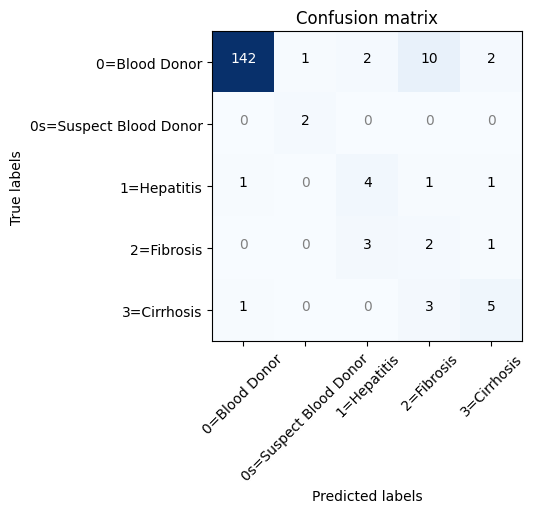

In [31]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Data
__binary = False
logistic_regression_data = data(version=7, pca=True, resample_strat=1, binary=__binary)

# Init the model
logistic_regression = LogisticRegression(random_state=86)

# Hyper-parameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [100, 200, 300, 400, 500]}
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='recall_macro', verbose=1, n_jobs=-1)

grid_search.fit(logistic_regression_data[0], logistic_regression_data[2].ravel() if __binary else logistic_regression_data[2].values.ravel())
print("Best parameters:", grid_search.best_params_)
evaluate(grid_search.best_estimator_, logistic_regression_data[1], logistic_regression_data[3])

### 3.6 Neural Networks

 #################### 
 Model Evaluation:
 #################### 

(1) Performance Evaluation:
                        precision    recall  f1-score   support

         0=Blood Donor       0.99      0.99      0.99       157
0s=suspect Blood Donor       1.00      0.50      0.67         2
           1=Hepatitis       0.50      0.14      0.22         7
            2=Fibrosis       0.30      0.50      0.37         6
           3=Cirrhosis       0.50      0.67      0.57         9

              accuracy                           0.92       181
             macro avg       0.66      0.56      0.57       181
          weighted avg       0.93      0.92      0.92       181



/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


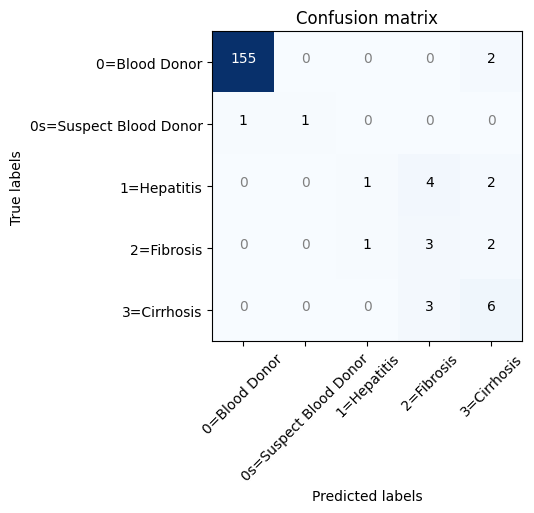

In [32]:
# Neural network
from sklearn.neural_network import MLPClassifier

# Data
__binary = False
neural_network_data = data(version=1, pca=False, resample_strat=1, binary=__binary)

# Init the model
neural_network = MLPClassifier(hidden_layer_sizes=(5, 300, 300, 5), random_state=86, learning_rate='adaptive', activation='tanh')

neural_network.fit(neural_network_data[0], neural_network_data[2].ravel() if __binary else neural_network_data[2].values.ravel())
evaluate(neural_network, neural_network_data[1], neural_network_data[3])


---
# 4 Concluding Insights

##### This is just a very brief and simple summary of the insights from this report. I look forward to further discussing all the choices and strategies used in the video-call presentation of the project later!

##### 4.1 Summary of Results

Given the nature of the data that we have worked with in this paper, the focus has been on eliminating the risk of false-negatives as they would potentially result in the most dire consequences compared to false-positives that could later be disproved.

In the first section of the model constructing I constructed a KNN model with hyperparameter adjustment by cross-validation grid search. This model had some non-promising results, with 9 false-negatives. In order to attemptedly improve the model, I decided to implement the model into a One-vs-Rest implementation to hopefully improve the performance on the multi-level classification problem. This improved the model, but it still had 2 false-negatives, which I figured could be improved upon.

Later on I created a decision tree approach with a pre-pruning strategy devised from a cross-validation grid search. The decision tree approach resulted in a decrease from 9 to 1 false-negatives which was a step in the right direction. However, with the tree that was constructed, before and after post-pruning, also followed more false-positives and a worse precision and recall of the exact distinctions between the different liver diseases.

Moreover, the ensemble learning strategy improved upon the tree classification with less false-positives in the random-forest classifier and no false-negatives. The gradient-boosting approach resulted in, again, more false-negatives which makes it a less plausible approach with the configuration used.

The most interesting results were found in the approach with the neural networks. Here the false-negatives were not prominent to the same extent, and the precision and recall was greatly improved relative to the other approaches.

---

# 5 Bibliography

[1] Lichtinghagen,Ralf, Klawonn,Frank, and Hoffmann,Georg. (2020). *HCV data*. UCI Machine Learning Repository. Accessed 13.01.24. https://doi.org/10.24432/C5D612.

[2] Srinidhi, Sunny. (2019). *Use ColumnTransformer in SciKit instead of LabelEncoding and OneHotEncoding for data preprocessing in Machine Learning*. Towards Data Science. Accessed 31.01.24. https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b